In [55]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn import ensemble, tree, linear_model
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Lasso
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\VENKA\Desktop\Data Science\Python Anaconda\airbnb_analysisf.csv")

In [30]:
df.columns

Index(['_id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'transit', 'access', 'interaction',
       'house_rules', 'property_type', 'room_type', 'bed_type', 'cleaning_fee',
       'minimum_nights', 'maximum_nights', 'cancellation_policy',
       'last_scraped', 'calendar_last_scraped', 'first_review', 'last_review',
       'accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'bathrooms',
       'amenities', 'price', 'extra_people', 'guests_included', 'host_id',
       'host_name', 'host_about', 'host_response_time', 'host_neighbourhood',
       'host_response_rate', 'host_is_superhost', 'host_identity_verified',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'security_deposit', 'street2', 'suburb',
       'government_area', 'market', 'country', 'country_code', 'location',
       'type', 'longitude', 'latitude', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'review_scores_a

In [4]:
pd.set_option("display.max_columns", 100)
df.head()

,_id,name,summary,space,description,neighborhood_overview,transit,access,interaction,house_rules,property_type,room_type,bed_type,cleaning_fee,minimum_nights,maximum_nights,cancellation_policy,last_scraped,calendar_last_scraped,first_review,last_review,accommodates,bedrooms,beds,number_of_reviews,bathrooms,amenities,price,extra_people,guests_included,host_id,host_name,host_about,host_response_time,host_neighbourhood,host_response_rate,host_is_superhost,host_identity_verified,host_listings_count,host_total_listings_count,host_verifications,security_deposit,street2,suburb,government_area,market,country,country_code,location,type,longitude,latitude,availability_30,availability_60,availability_90,availability_365,review_scores_accuracy,review_scores_accuracy.1,review_scores_cleanliness,review_scores_cleanliness.1,review_scores_checkin,review_scores_checkin.1,review_scores_communication,review_scores_communication.1,review_scores_location,review_scores_location.1,review_scores_value,review_scores_value.1,review_scores_rating,review_scores_rating.1,host_street,host_city,host_district,street2.1,state,country.1,year
0,10006546,Ribeira Charming Duplex,Fantastic duplex apartment with three bedrooms...,Privileged views of the Douro River and Ribeir...,Fantastic duplex apartment with three bedrooms...,"In the neighborhood of the river, you can find...",Transport: • Metro station and S. Bento railwa...,We are always available to help guests. The ho...,"Cot - 10 € / night Dog - € 7,5 / night",Make the house your home...,House,Entire home/apt,Real Bed,35.0,2,30,moderate,2019-02-16 05:00:00,2019-02-16 05:00:00,2016-01-03 05:00:00,2019-01-20 05:00:00,8,3.0,5.0,51,1.0,"['TV', 'Cable TV', 'Wifi', 'Kitchen', 'Paid pa...",80.0,15.0,6.0,51399391,Ana&Gonçalo,"Gostamos de passear, de viajar, de conhecer pe...",within an hour,NaN,100.0,False,True,3,3,"['email', 'phone', 'reviews', 'jumio', 'offlin...",200.0,"Porto, Porto, Portugal",NaN,"Cedofeita, Ildefonso, Sé, Miragaia, Nicolau, V...",Porto,Portugal,PT,"{'type': 'Point', 'coordinates': [-8.61308, 41...",Point,-8.613080,41.141300,28,47,74,239,9.0,9.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,89.0,89.0,Porto,Porto District,Portugal,Porto,Porto,Portugal,2019.0
1,10009999,Horto flat with small garden,One bedroom + sofa-bed in quiet and bucolic ne...,Lovely one bedroom + sofa-bed in the living ro...,One bedroom + sofa-bed in quiet and bucolic ne...,This charming ground floor flat is located in ...,"Easy access to transport (bus, taxi, car) and ...",NaN,"I´ll be happy to help you with any doubts, tip...",I just hope the guests treat the space as they...,Apartment,Entire home/apt,Real Bed,187.0,2,1125,flexible,2019-02-11 05:00:00,2019-02-11 05:00:00,2016-01-03 05:00:00,2019-02-07 05:00:00,4,1.0,2.0,0,1.0,"['Wifi', 'Wheelchair accessible', 'Kitchen', '...",317.0,0.0,1.0,1282196,Ynaie,I am an artist and traveling is a major part o...,NaN,Jardim Botânico,100.0,False,False,1,1,"['email', 'phone', 'facebook']",200.0,"Rio de Janeiro, Rio de Janeiro, Brazil",Jardim Botânico,Jardim Botânico,Rio De Janeiro,Brazil,BR,"{'type': 'Point', 'coordinates': [-43.23074991...",Point,-43.230750,-22.966254,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rio de Janeiro,State of Rio de Janeiro,Brazil,Rio de Janeiro,Rio de Janeiro,Brazil,NaN
2,1001265,Ocean View Waikiki Marina w/prkg,A short distance from Honolulu's billion dolla...,Great studio located on Ala Moana across the s...,A short distance from Honolulu's billion dolla...,You can breath ocean as well as aloha.,Honolulu does have a very good air conditioned...,"Pool, hot tub and tennis","We try our best at creating, simple responsive...",The general welfare and well being of all the ...,Condominium,Entire home/apt,Real Bed,100.0,3,365,strict_14_with_grace_period,2019-03-06 05:00:00,2019-03-06 05:00:00,2013-05-24 04:00:00,2019-02-07 05:00:00,2,1.0,1.0,96,1.0,"['TV', 'Cable TV', 'Wifi', 'Air conditioning',...",115.0,0.0,1.0,5448114,David,I have 30 years 

In [5]:
df.shape

(5555, 77)

In [6]:
df = df.rename(columns={'street2.1': 'neighbourhood'})

In [31]:
Req_col = ['neighbourhood','room_type','price','minimum_nights','host_listings_count','availability_365','country']

airb_df = df[Req_col]
airb_df

,neighbourhood,room_type,price,minimum_nights,host_listings_count,availability_365,country
0,Porto,Entire home/apt,80.00,2,3,239,Portugal
1,Rio de Janeiro,Entire home/apt,317.00,2,1,0,Brazil
2,Honolulu,Entire home/apt,115.00,3,18,343,United States
3,Brooklyn,Private room,40.00,14,1,0,United States
4,Rio de Janeiro,Private room,701.00,1,1,363,Brazil
...,...,...,...,...,...,...,...
5550,Porto,Entire home/apt,58.00,3,8,300,Portugal
5551,Kadıköy,Entire home/apt,501.00,1,2,365,Turkey
5552,Rio de Janeiro,Private room,101.00,3,3,53,Brazil
5553,Lahaina,Entire home/apt,227.00,3,58,243,United States


In [32]:
airb_df.head()

,neighbourhood,room_type,price,minimum_nights,host_listings_count,availability_365,country
0,Porto,Entire home/apt,80.00,2,3,239,Portugal
1,Rio de Janeiro,Entire home/apt,317.00,2,1,0,Brazil
2,Honolulu,Entire home/apt,115.00,3,18,343,United States
3,Brooklyn,Private room,40.00,14,1,0,United States
4,Rio de Janeiro,Private room,701.00,1,1,363,Brazil


In [33]:
airb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5555 entries, 0 to 5554
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood        5554 non-null   object 
 1   room_type            5555 non-null   object 
 2   price                5555 non-null   float64
 3   minimum_nights       5555 non-null   int64  
 4   host_listings_count  5555 non-null   int64  
 5   availability_365     5555 non-null   int64  
 6   country              5555 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 303.9+ KB


In [34]:
airb_df.neighbourhood.fillna(airb_df.neighbourhood.mode()[0],inplace=True)

In [37]:
airb_df['room_type']=airb_df['room_type'].factorize()[0]
airb_df['neighbourhood']=airb_df['neighbourhood'].factorize()[0]
airb_df['country']=airb_df['country'].factorize()[0]

In [38]:
airb_df

,neighbourhood,room_type,price,minimum_nights,host_listings_count,availability_365,country
0,0,0,80.00,2,3,239,0
1,1,0,317.00,2,1,0,1
2,2,0,115.00,3,18,343,2
3,3,1,40.00,14,1,0,2
4,1,1,701.00,1,1,363,1
...,...,...,...,...,...,...,...
5550,0,0,58.00,3,8,300,0
5551,5,0,501.00,1,2,365,3
5552,1,1,101.00,3,3,53,1
5553,25,0,227.00,3,58,243,2


In [39]:
mode_value = airb_df[airb_df['availability_365'] != 0]['availability_365'].mode()[0]

In [40]:
mode_value

365

In [41]:
airb_df['availability_365'] = airb_df['availability_365'].replace(0, mode_value)

In [42]:
airb_df

,neighbourhood,room_type,price,minimum_nights,host_listings_count,availability_365,country
0,0,0,80.00,2,3,239,0
1,1,0,317.00,2,1,365,1
2,2,0,115.00,3,18,343,2
3,3,1,40.00,14,1,365,2
4,1,1,701.00,1,1,363,1
...,...,...,...,...,...,...,...
5550,0,0,58.00,3,8,300,0
5551,5,0,501.00,1,2,365,3
5552,1,1,101.00,3,3,53,1
5553,25,0,227.00,3,58,243,2


In [43]:
y = airb_df['price']
x= airb_df.drop(['price'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

In [46]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [20:03<00:00, 28.65s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 611
[LightGBM] [Info] Number of data points in the train set: 4444, number of used features: 6
[LightGBM] [Info] Start training from score 274.216922
                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
GradientBoostingRegressor                    0.17       0.17    533.56   
MLPRegressor                                 0.02       0.02    579.67   
PoissonRegressor                             0.01       0.01    582.98   
Lars                                         0.01       0.01    583.01   
LinearRegression                             0.01       0.01    583.01   
TransformedTargetRegressor                   0.01       0.01    583.01   
Rid

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

linreg = LinearRegression()
linreg.fit(x_train,y_train)
y_pred=(linreg.predict(x_test))
print(y_pred)
print('R-squared train score: {:.3f}'.format(linreg.score(x_train, y_train)))
print('R-squared test score: {:.3f}'.format(linreg.score(x_test, y_test)))

[323.55289072 168.06654232 346.06856371 ... 318.55149112 305.5346936
 336.26979412]
R-squared train score: 0.003
R-squared test score: 0.013


In [58]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

print('R-squared score (training): {:.3f}'.format(DTree.score(x_train, y_train)))
print('R-squared score (test): {:.3f}'.format(DTree.score(x_test, y_test)))

R-squared score (training): 0.973
R-squared score (test): -19.416


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(x_train, y_train)


y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 395530.98585160595


In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_regressor.fit(x_train, y_train)

y_pred = gb_regressor.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)


print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r_squared)

feature_importances = gb_regressor.feature_importances_
print("Feature Importances:", feature_importances)

Mean Squared Error (MSE): 356439.0189654749
Root Mean Squared Error (RMSE): 597.025140982752
R-squared (R2): 0.13726899878057353
Feature Importances: [0.178355   0.10934804 0.11664674 0.05711679 0.14411419 0.39441925]


In [48]:
diff = y_test - y_pred

<Axes: xlabel='price', ylabel='Density'>

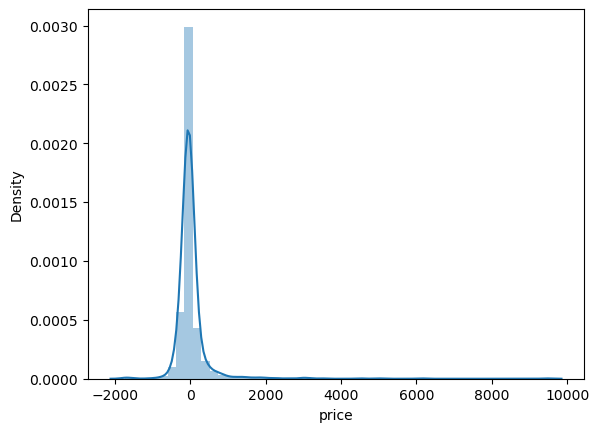

In [49]:
import seaborn as sns
sns.distplot(diff)

In [61]:
import pickle
pickle.dump(gb_regressor, open('./gb_regressor.sav', 'wb'))

In [53]:
import numpy as np

data_points = [
    [0, 0, 2, 3, 239,8],  
    [1, 0, 2, 1, 365,4]   
]

processed_data_points = np.array(data_points)

y_new_pred = gb_regressor.predict(processed_data_points)

for i in range(len(data_points)):
    print(f"Predicted Price for Data Point {i+1}: {y_new_pred[i]}")


Predicted Price for Data Point 1: 263.6547818486666
Predicted Price for Data Point 2: 395.1419068202399
